# Diabetes Prediction

In [1]:
# Import Required Libraries

In [2]:
import pandas as pd
import seaborn as sns
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold , cross_val_score , GridSearchCV , RandomizedSearchCV , StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score , accuracy_score , classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler , SMOTE

In [3]:
# Load The Dataset

In [4]:
dataset = pd.read_csv("Diabetes.csv")

In [5]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Data Preprocessing

In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
dataset.shape

(768, 9)

In [10]:
# # Replace 0 values in some columns with median

In [11]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for col in cols:
    dataset[col] = dataset[col].replace(0 , dataset[col].mean())

In [12]:
dataset.duplicated().sum()

0

In [13]:
# Outlier

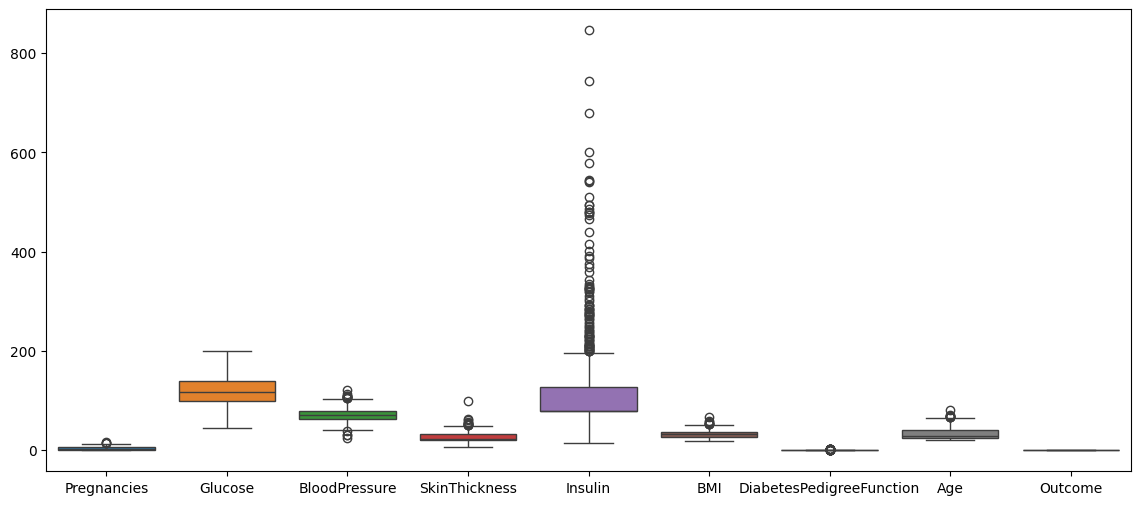

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(data=dataset[dataset.select_dtypes(include=['int64','float64']).columns])
plt.show()

In [15]:
# q1 = dataset["Insulin"].quantile(0.25)
# q3 = dataset["Insulin"].quantile(0.75)

# IQR = q3 - q1

# min_range = q1 - (1.5 * IQR)
# max_range = q3 + (1.5 * IQR)

# new_dataset = dataset[dataset["Insulin"] <= max_range]

In [16]:
dataset.shape

(768, 9)

In [17]:
# Feature and target

In [18]:
x = dataset.iloc[:,:-1]
y = dataset["Outcome"]

In [19]:
# Spliting The data into train test

In [20]:
X_train , X_test , Y_train , Y_test = train_test_split(x , y , test_size=0.2, random_state=42) 

In [21]:
print(f"Training Shape : {X_train.shape}")
print(f"Testing Size : {X_test.shape}")

Training Shape : (614, 8)
Testing Size : (154, 8)


In [22]:
# Scaling

In [23]:
numeric_colum = X_train.select_dtypes(include=['int64','float64']).columns

In [24]:
scaler = StandardScaler()
X_train[numeric_colum] = scaler.fit_transform(X_train[numeric_colum])
X_test[numeric_colum] = scaler.transform(X_test[numeric_colum])

In [25]:
# Balancing the class Ditribution

In [26]:
print(f"Value Count : {Y_train.value_counts()}")

Value Count : Outcome
0    401
1    213
Name: count, dtype: int64


In [27]:
# making dataset balance

In [28]:
sm = RandomOverSampler()
x_train , y_train = sm.fit_resample(X_train,Y_train)

In [29]:
print("Before :", Y_train.value_counts())
print("After :", y_train.value_counts())

Before : Outcome
0    401
1    213
Name: count, dtype: int64
After : Outcome
0    401
1    401
Name: count, dtype: int64


In [30]:
# Model Training + Cross-Validation

In [31]:
models = {

    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'XGBoost':xgb.XGBClassifier()
}

In [32]:
for name , model in models.items():
    model.fit(x_train , y_train)
    y_pred = model.predict(X_test)
    print(f"{name} | Accuracy Score : {accuracy_score(Y_test , y_pred)*100:.3f}%")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model , x_train , y_train , cv=cv , scoring='f1')
    print(f"{name} | Mean F1-Score After CV : {np.mean(scores)*100:.3f}\n")

Logistic Regression | Accuracy Score : 70.779%
Logistic Regression | Mean F1-Score After CV : 75.457

KNN | Accuracy Score : 70.779%
KNN | Mean F1-Score After CV : 76.313

SVM | Accuracy Score : 72.727%
SVM | Mean F1-Score After CV : 78.714

Decision Tree | Accuracy Score : 70.779%
Decision Tree | Mean F1-Score After CV : 80.982

Random Forest | Accuracy Score : 75.974%
Random Forest | Mean F1-Score After CV : 86.190

AdaBoost | Accuracy Score : 73.377%
AdaBoost | Mean F1-Score After CV : 77.324

GradientBoost | Accuracy Score : 74.026%
GradientBoost | Mean F1-Score After CV : 82.263

XGBoost | Accuracy Score : 72.727%
XGBoost | Mean F1-Score After CV : 84.414



In [33]:
# Train Best Model

In [34]:
best_model = RandomForestClassifier()
best_model.fit(x_train , y_train)
y_pred = best_model.predict(X_test)

In [35]:
# Model Evaluation

In [36]:
print("Training Score :",best_model.score(x_train,y_train)*100)
print("Testing Score :",best_model.score(X_test,Y_test)*100)
print("Accuracy Score :",accuracy_score(Y_test,y_pred)*100)
print("Precision Score :",round(precision_score(Y_test,y_pred)*100,3))
print("Recall Score :",round(recall_score(Y_test,y_pred)*100,3))
print("F1-Score :",round(f1_score(Y_test,y_pred)*100,3))

Training Score : 100.0
Testing Score : 75.32467532467533
Accuracy Score : 75.32467532467533
Precision Score : 63.934
Recall Score : 70.909
F1-Score : 67.241


In [37]:
# Confusion Matrix

In [38]:
cm = confusion_matrix(Y_test,y_pred)

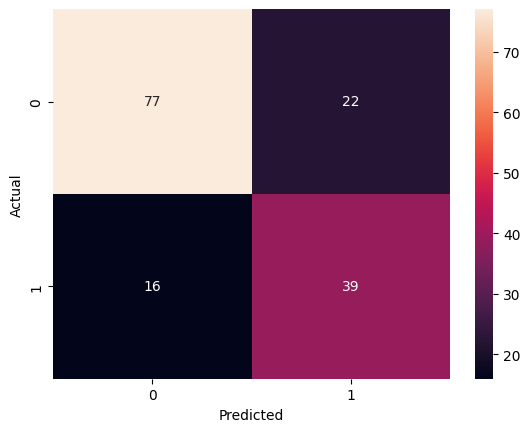

In [39]:
sns.heatmap(data=cm,annot=True,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
# Detailed Report

In [41]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [42]:
# final_model = RandomForestClassifier(n_estimators = 300, max_depth= 11, criterion = 'entropy')
# final_model.fit(x_train , y_train)
# final_model.score(x_train , y_train)*100 , final_model.score(x_test,y_test)*100

In [43]:
# Hyperparameter Tuning

In [44]:
parameter = {'n_estimators':[i for i in range(100,1000,100)],
            'criterion':["gini", "entropy", "log_loss"],
            'max_depth':[j for j in range(1,21)]}

In [45]:
rscv = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=parameter,
    n_iter=50,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

In [46]:
# rscv.fit(x_train , y_train)

In [47]:
# print("Best Paramater :",rscv.best_params_)
# print("Best CV Score :",rscv.best_score_*100)

In [48]:
# Final Model Training & Testing

In [51]:
print("Accuracy score of Final Model :",accuracy_score(Y_test,y_prd)*100)

Accuracy score of Final Model : 75.97402597402598


In [52]:
# plot_decision_regions(X_test, Y_test.to_numpy() , clf=final_model)
# plt.show()

In [53]:
# 10. Save Model for Deployment

In [54]:
joblib.dump(final_model,"Diabetes_prd_model.pkl")
joblib.dump(scaler,"Diabetes_scaler.pkl")

['Diabetes_scaler.pkl']